In [1]:
#https://www.vitoshacademy.com/python-making-maps-with-cartopy/

In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

In [3]:
#Higlight a single country

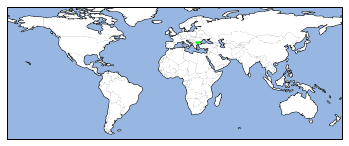

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['SOVEREIGNT'] == "Bulgaria":
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 1, 0))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 1, 1))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [5]:
#How can we make a heat map of the "richest countries"?

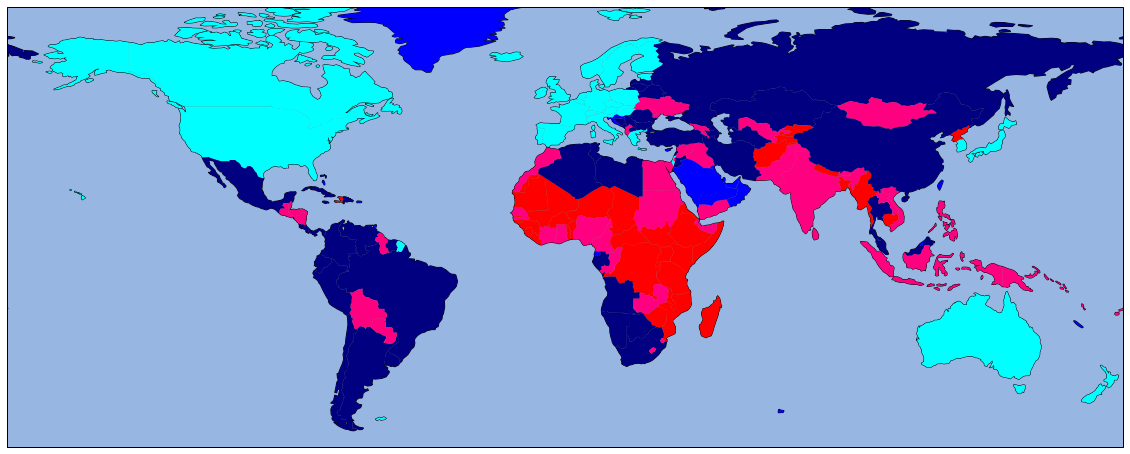

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['INCOME_GRP'].startswith("1"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 1, 1))
    elif country.attributes['INCOME_GRP'].startswith("2"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 1))            
    elif country.attributes['INCOME_GRP'].startswith("3"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 0.5))
    elif country.attributes['INCOME_GRP'].startswith("4"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0.5))
    elif country.attributes['INCOME_GRP'].startswith("5"):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 0, 0))

plt.rcParams["figure.figsize"] = (30,120)
plt.show()

In [7]:
# Countries with multiple territories

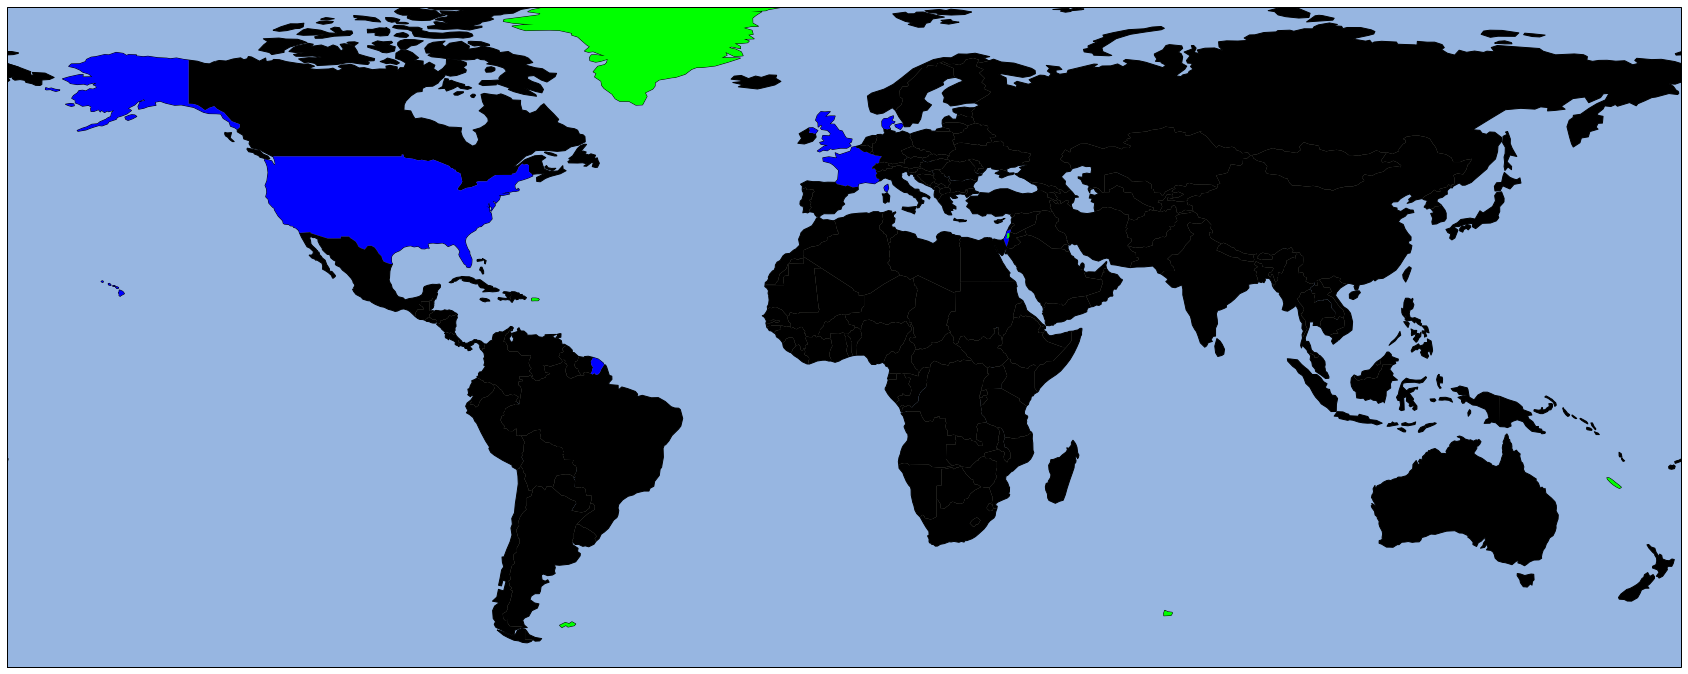

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])
multiple_country_list = ["Denmark", "France", "Israel", "United Kingdom", "United States of America"]

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['SOVEREIGNT'] in multiple_country_list:
        if country.attributes['NAME'] != country.attributes['SOVEREIGNT']:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 1, 0))
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 1))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(0, 0, 0), label = country.attributes['SOVEREIGNT'])
plt.rcParams["figure.figsize"] = (30,120)
plt.show()

In [9]:
#How to put a label over a country?

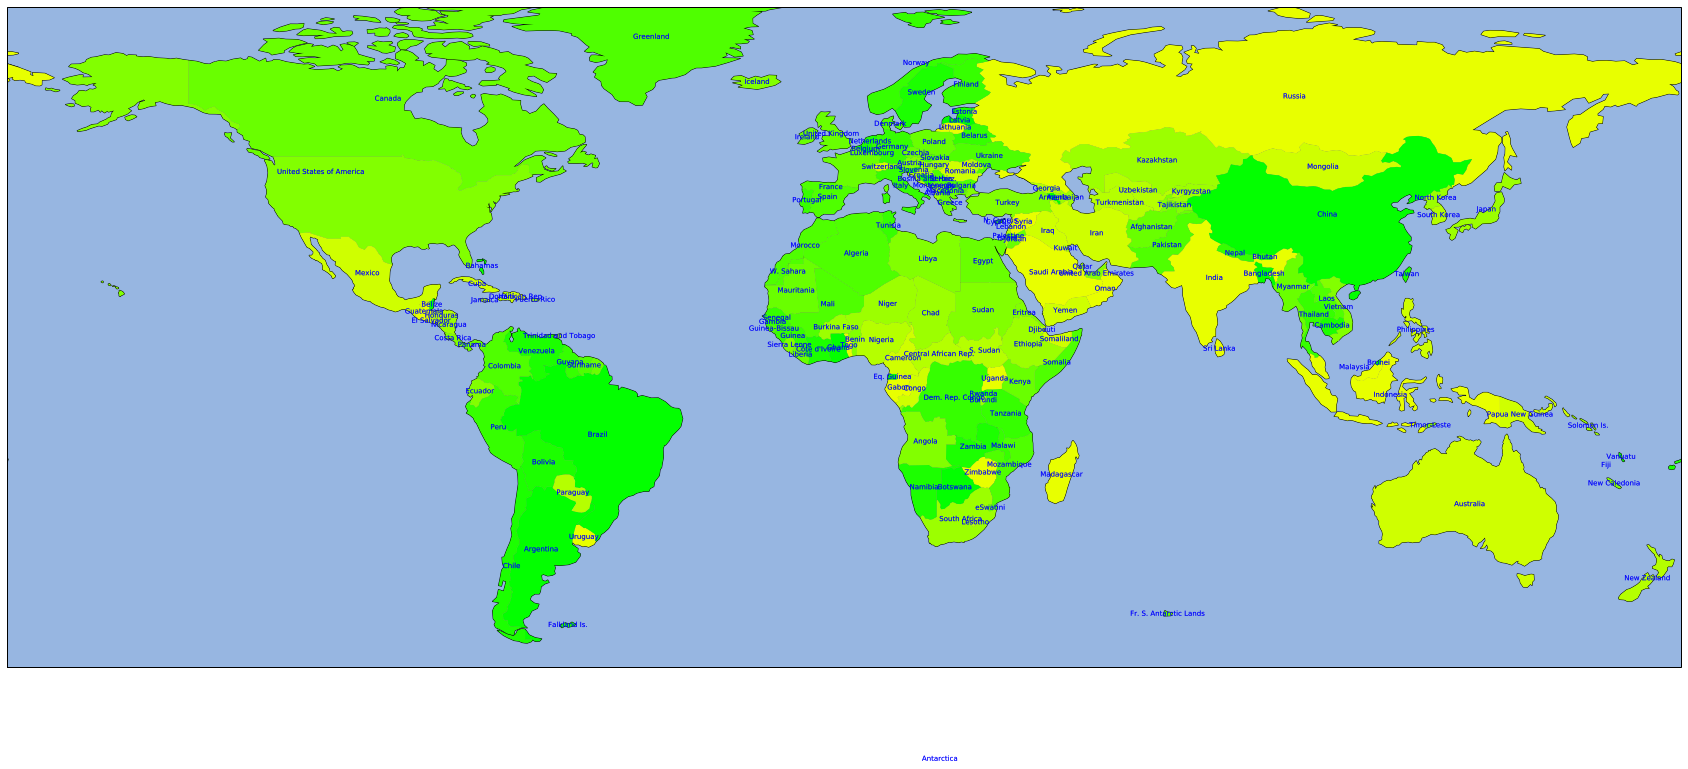

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])
plt.rcParams["figure.figsize"] = (50,150)

countries = reader.records()
my_color = 0.01
for country in countries:
    my_color = my_color + .1
    if my_color > 1:
        my_color = .01
    g = ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(my_color, 1, 0))
    x = country.geometry.centroid.x        
    y = country.geometry.centroid.y
    ax.text(x, y, country.attributes['NAME'], color='blue', size=7, ha='center', va='center', transform=ccrs.PlateCarree(), 
            path_effects=[PathEffects.withStroke(linewidth=0, foreground="k", alpha=.6)])

In [11]:
#Where are the rivers and the lakes?

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

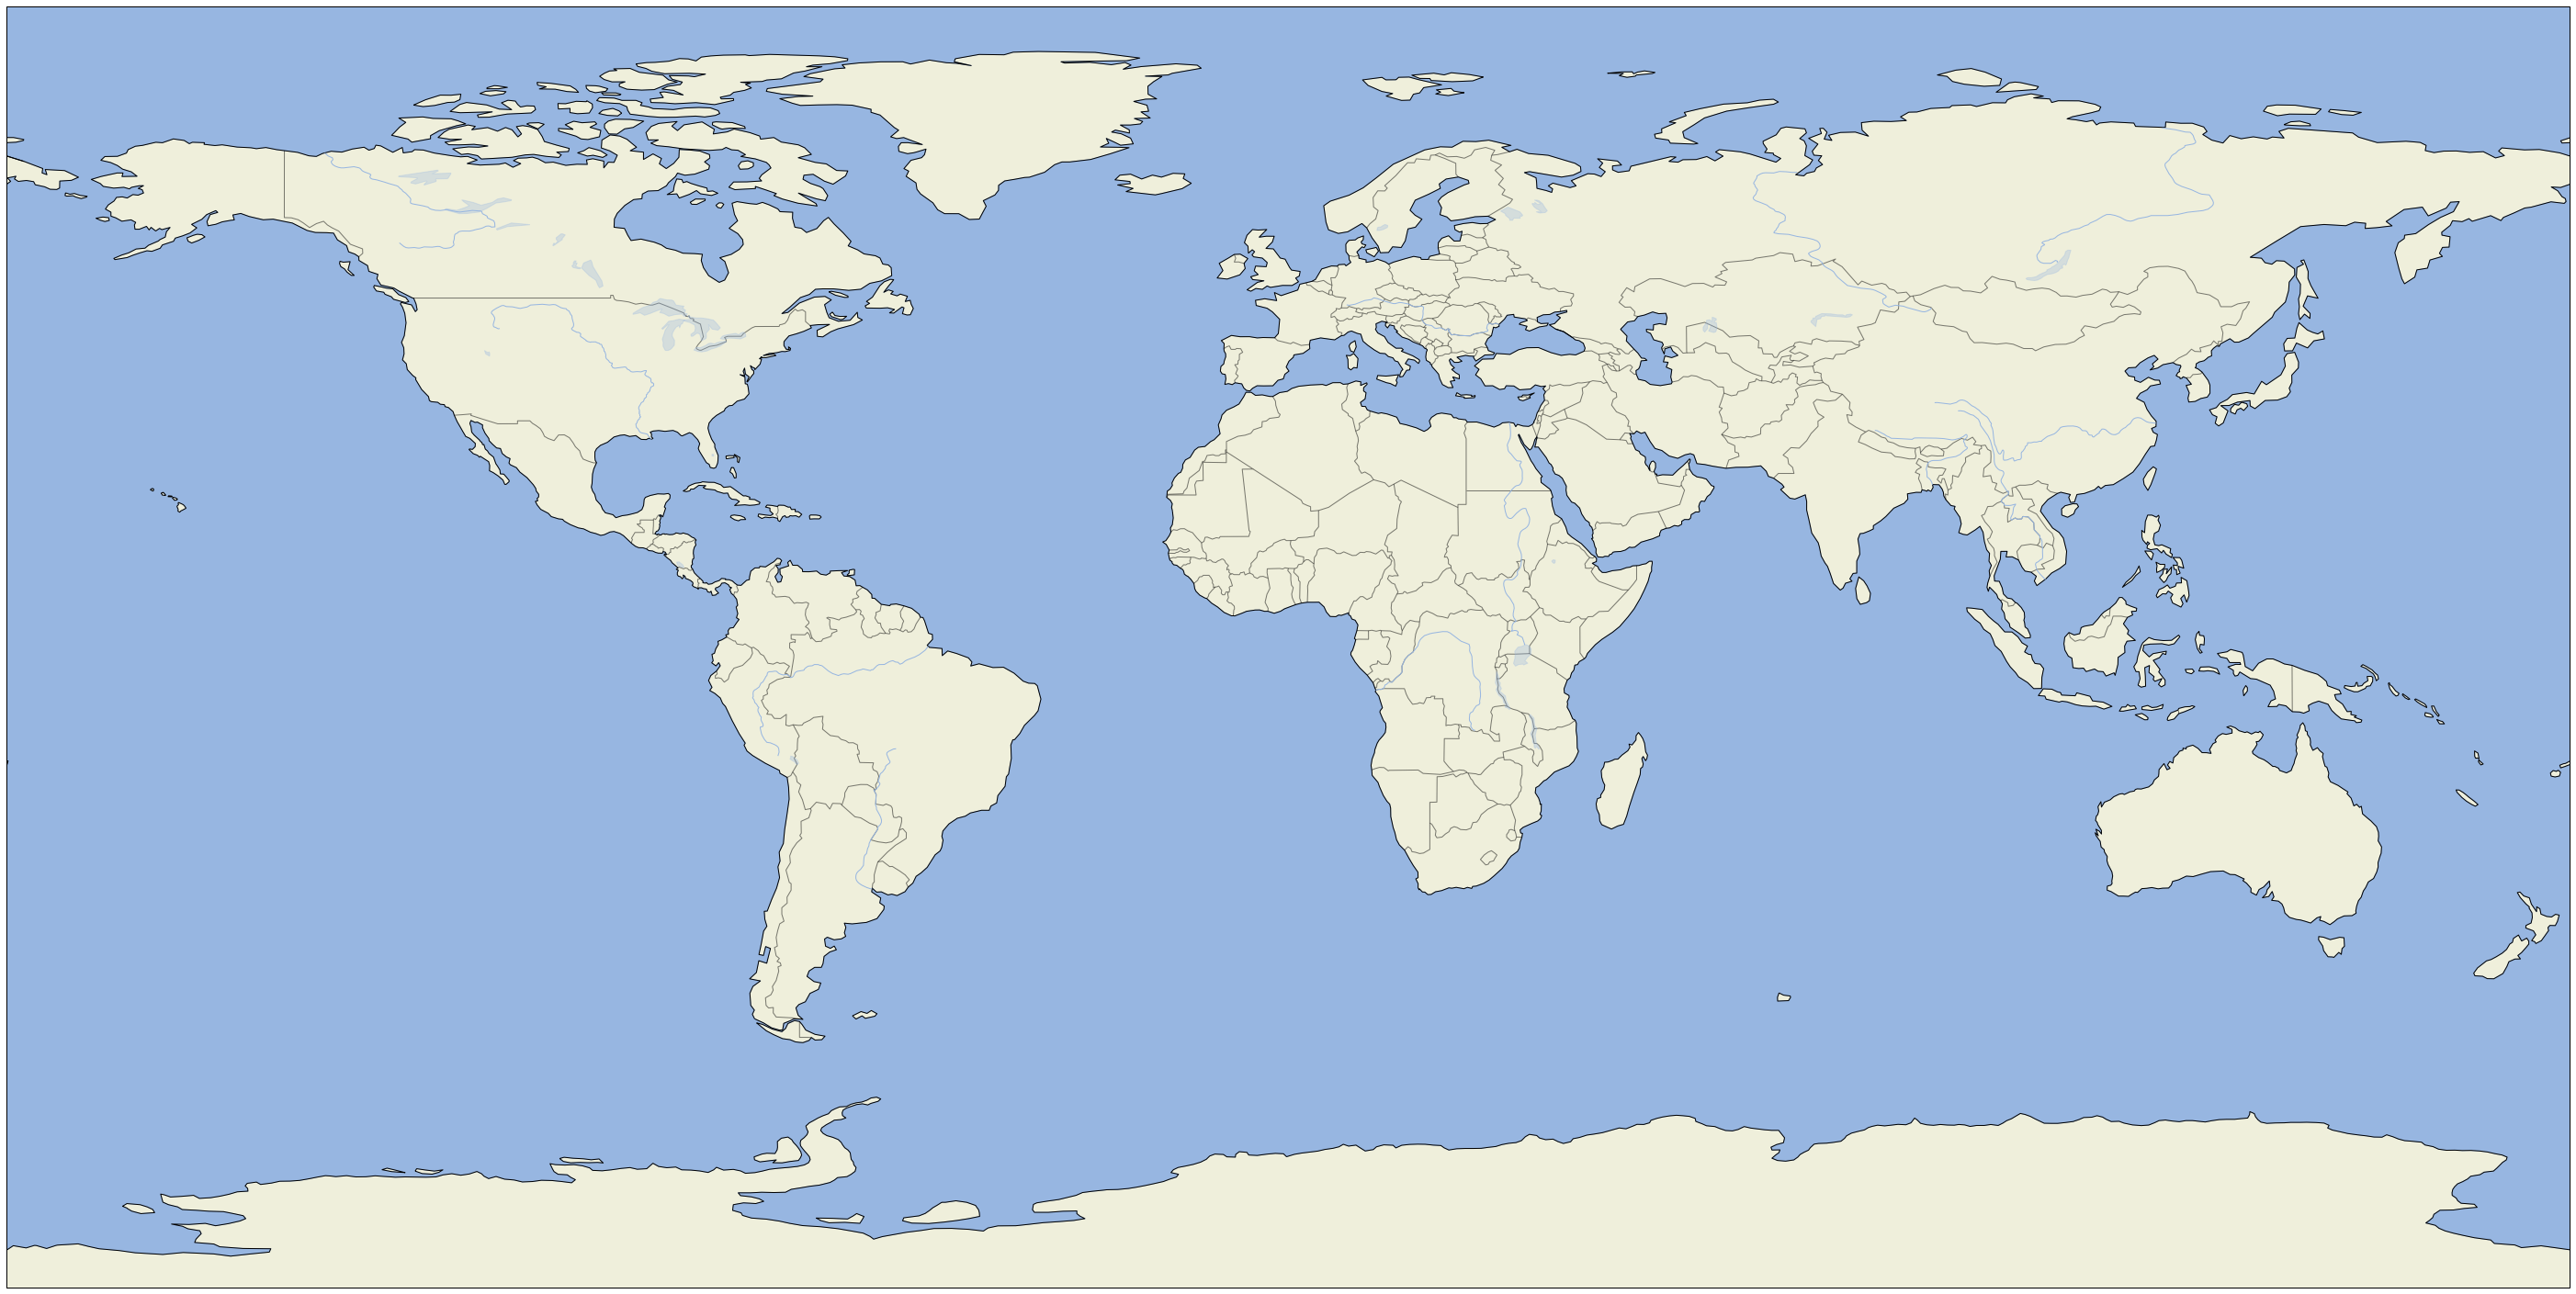

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax.add_feature(cartopy.feature.RIVERS)
plt

In [13]:
#Coloring a country with two colors, dividing it into North and South 

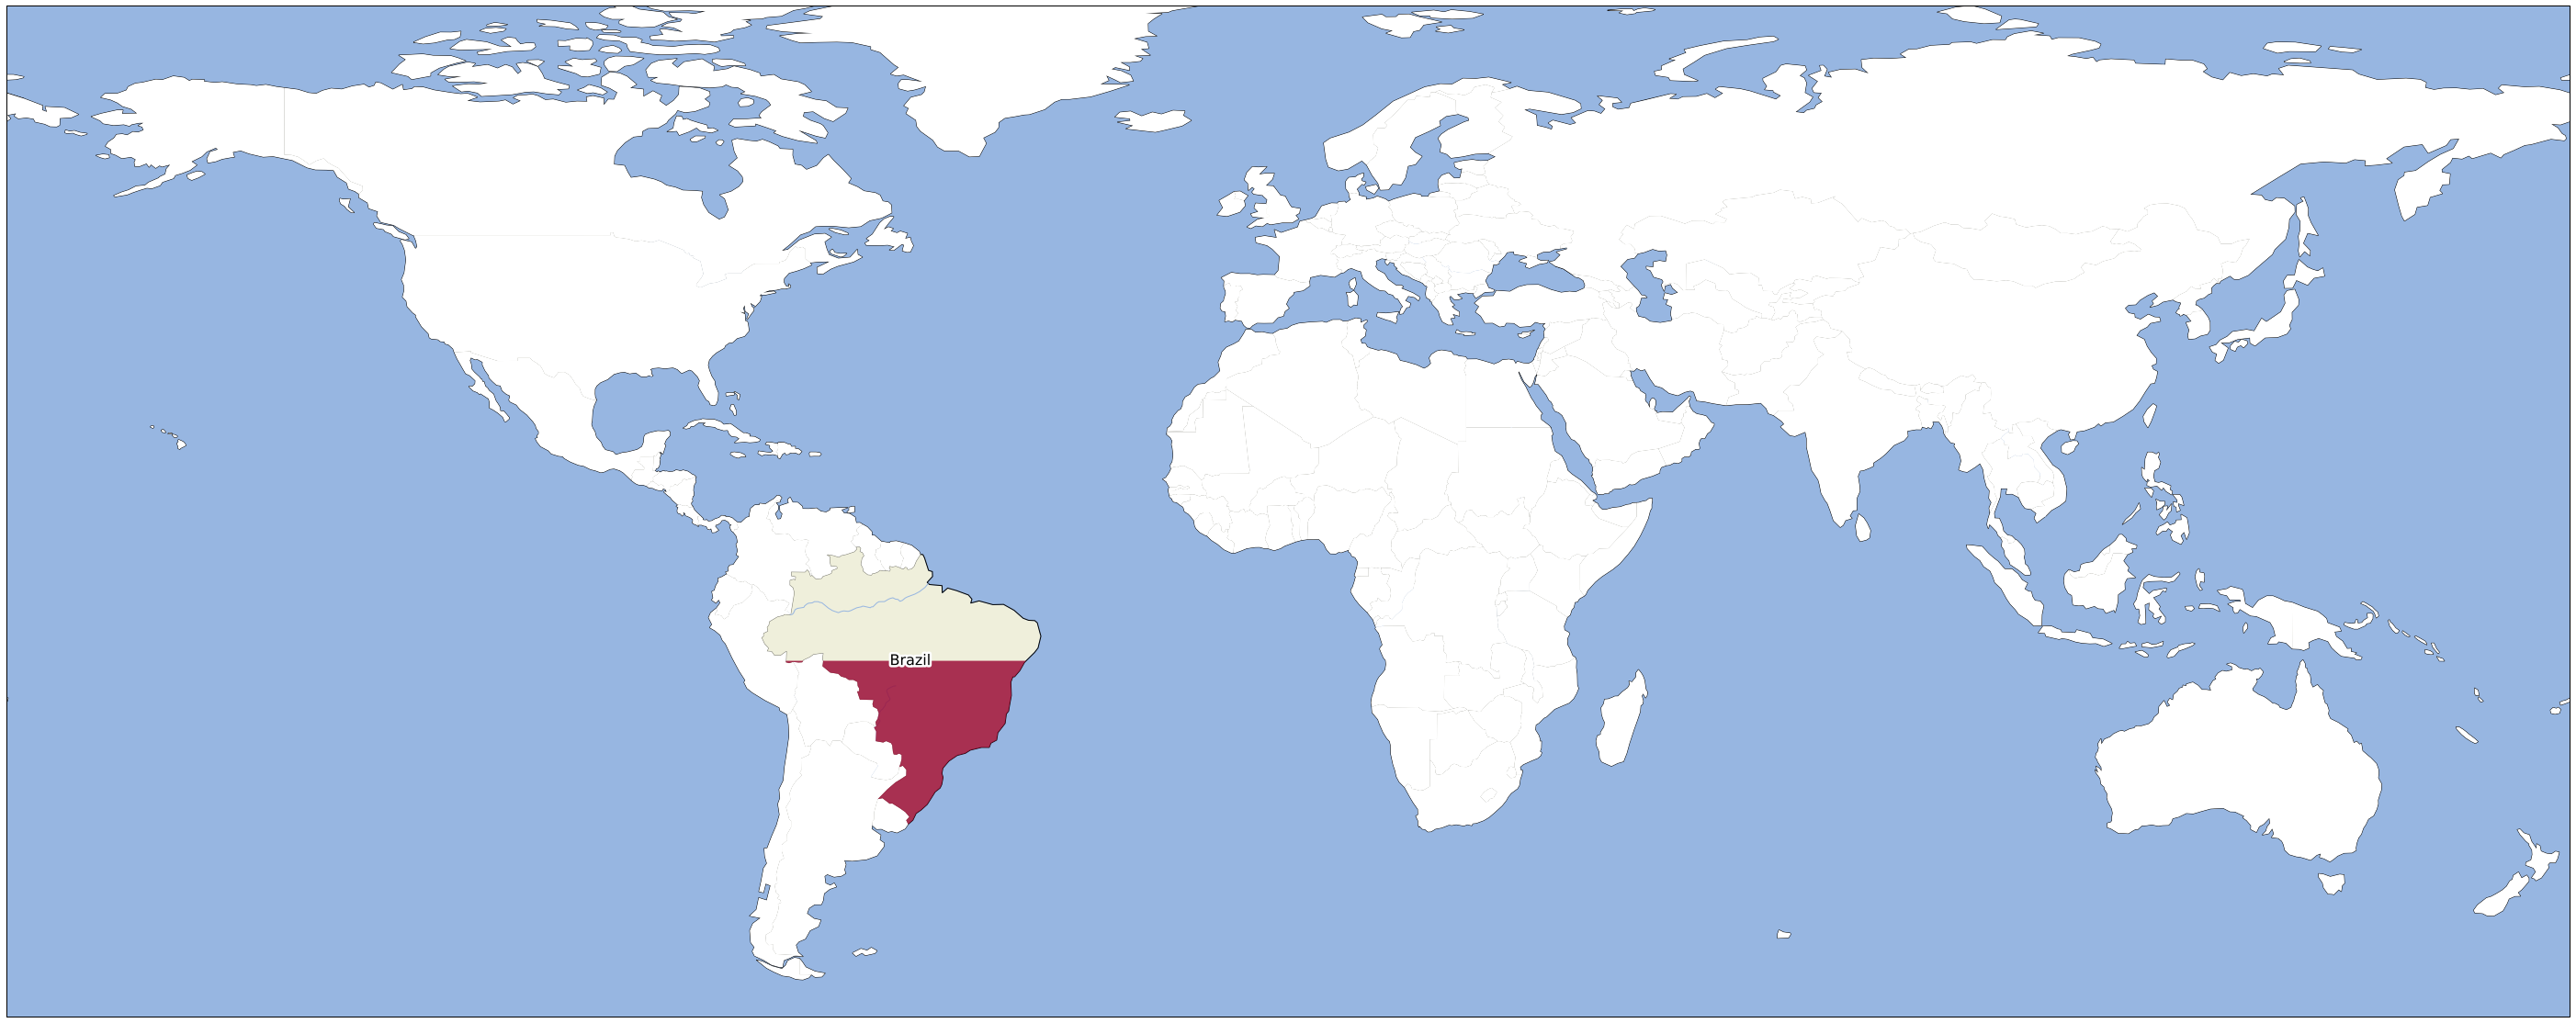

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.40)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-150, 60, -25, 60])
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_map_units')

reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['NAME'] in 'Brazil':
        l = LineString([(-180, country.geometry.centroid.y), 
                        (180, country.geometry.centroid.y)])
        
        north_line = [(-180, country.geometry.centroid.x), 
                        (180, country.geometry.centroid.x)]
        
        south_line = [(country.geometry.centroid.y, -180), 
                        (180, country.geometry.centroid.x)]
        
        north_poly = MultiLineString([l, north_line]).convex_hull
        south_poly = MultiLineString([l, south_line]).convex_hull

        g = ax.add_geometries([country.geometry.intersection(north_poly)], ccrs.PlateCarree(), facecolor=(.8, 0, 0, 0.8), zorder=99)
        g = ax.add_geometries([country.geometry.intersection(south_poly)], ccrs.PlateCarree(), facecolor=(0, 0.2, 0.9, 0.2), zorder=99)

        x = country.geometry.centroid.x        
        y = country.geometry.centroid.y

        ax.text(x, y, country.attributes['NAME'], color='k', size=16, ha='center', va='center', transform=ccrs.PlateCarree(), 
                path_effects=[PathEffects.withStroke(linewidth=5, foreground="w", alpha=1)], zorder=100)
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 1, 1), label=country.attributes['NAME'])

In [15]:
#Coloring a small country / city

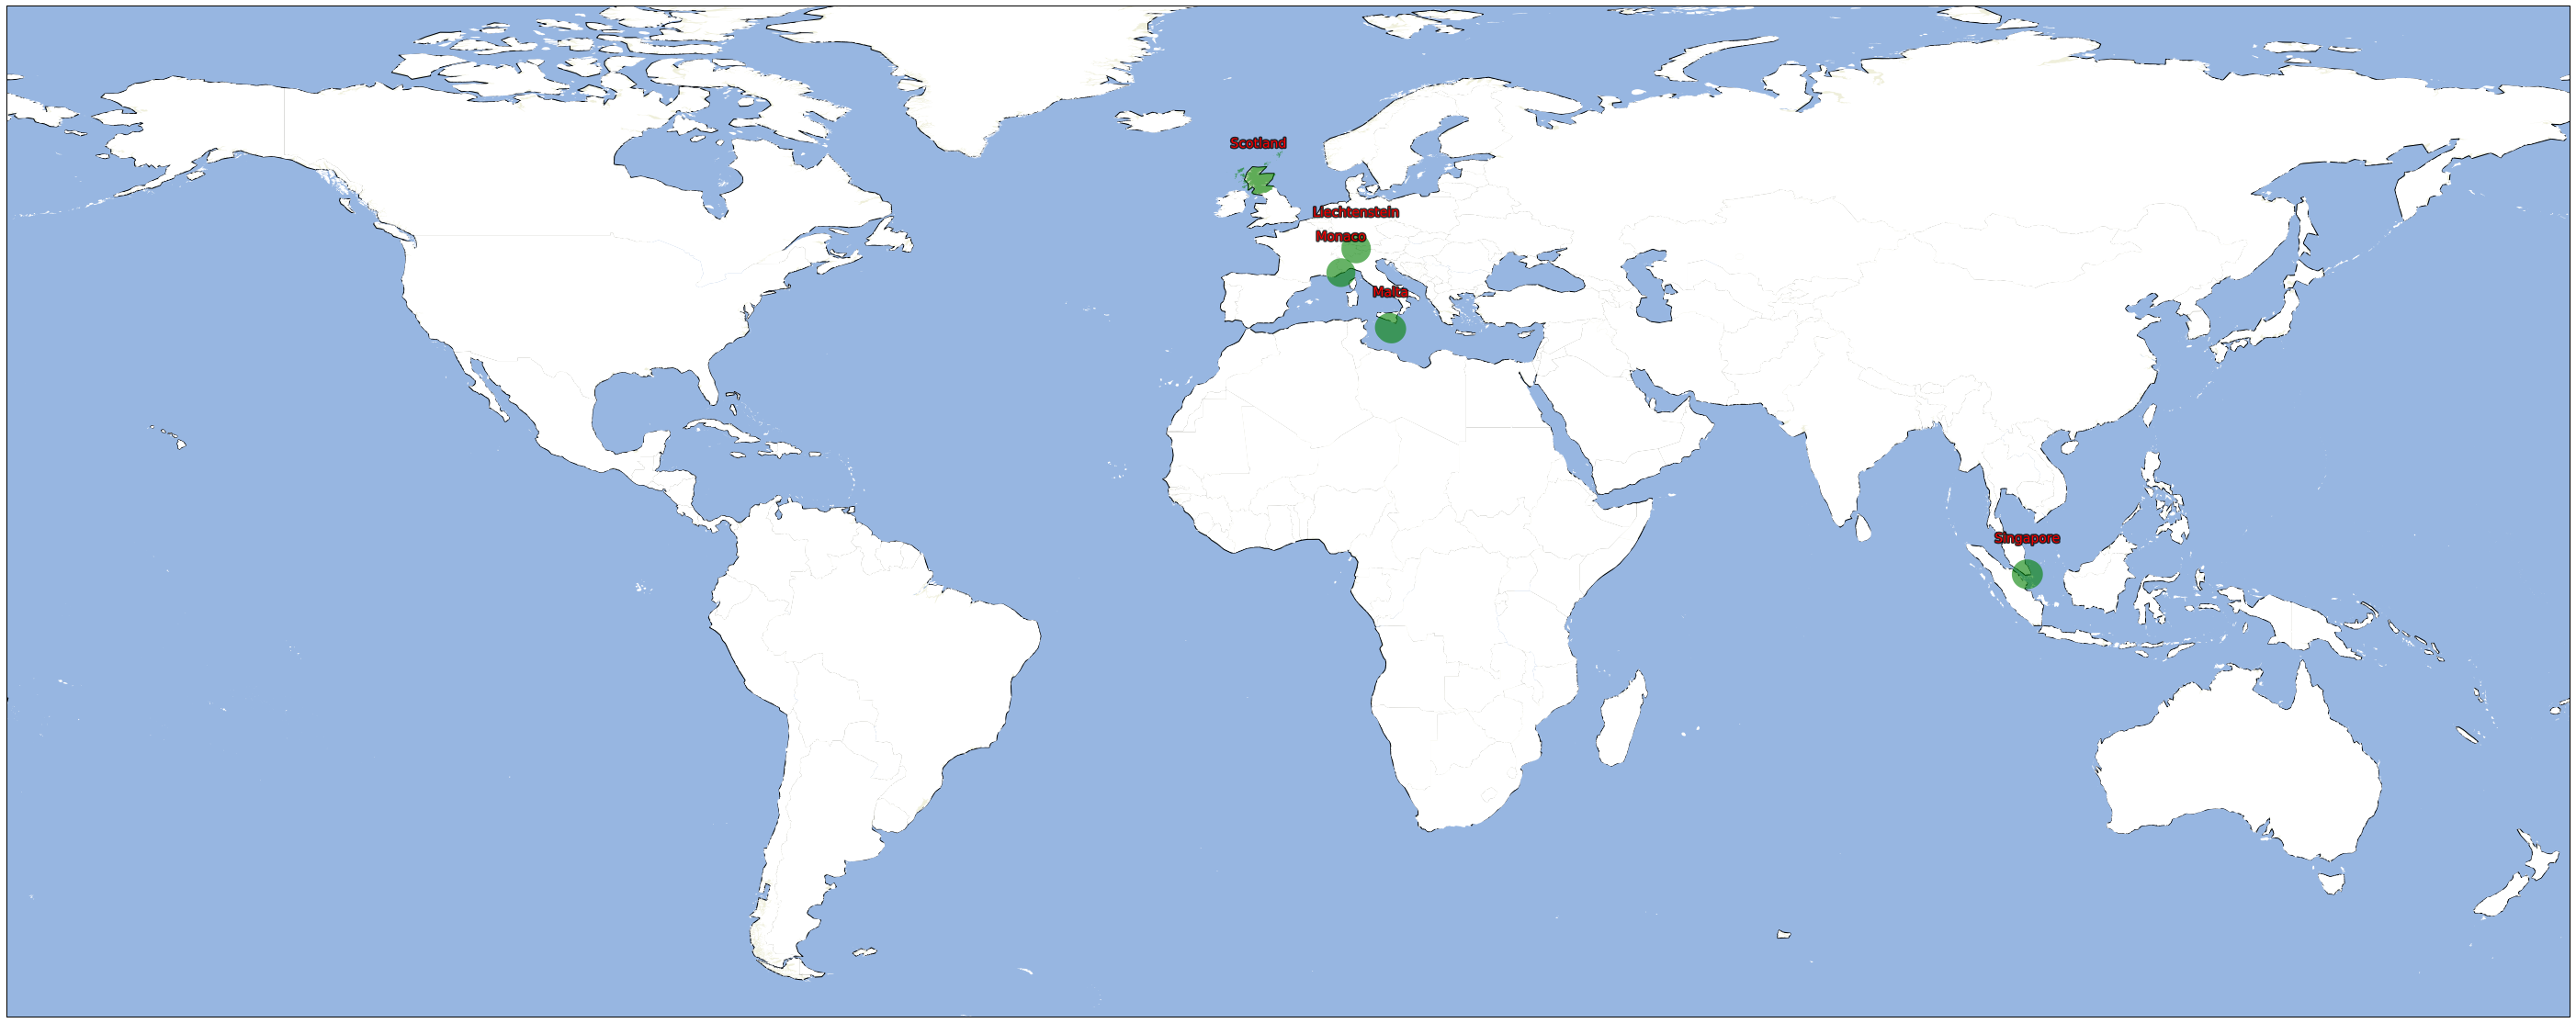

In [16]:
highlight = ['Singapore', 'Liechtenstein','Monaco', 'Scotland', 'Malta']

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_map_units')

reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['NAME'] in highlight:        
        if country.geometry.area < 2:
            geom = [country.geometry.buffer(2)]
        else:
            geom = [country.geometry]            
        g = ax.add_geometries(geom, ccrs.PlateCarree(), facecolor=(0, 0.5, 0, 0.6))
        x = country.geometry.centroid.x        
        y = country.geometry.centroid.y
        ax.text(x, y+5, country.attributes['NAME'], color='red', size=14, ha='center', va='center', transform=ccrs.PlateCarree(), 
                path_effects=[PathEffects.withStroke(linewidth=3, foreground="k", alpha=.8)])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1, 1, 1), label=country.attributes['NAME'])
plt.rcParams["figure.figsize"] = (50,50)

In [ ]:
#That's all folks!